In [1]:
import pandas as pd
#Read Data.
FIFA2022File = pd.read_csv("FIFA2022Features.csv")
FIFA2022File.head()

,team,Shots on Target,shots off Target,Shots Blocked,Corners,Offsides,Free Kicks,Total Passes,Passes Completed,Fouls,...,Num of Wins,Num of Loses,PPG,GoalKeeper OVR,Num of Wins in FIFAs,Num of Goals,Shots PG,Possession (%),Team Rating,Goalkeeper Saves
0,Morocco,3,4,2,2,3,11,363,284,11,...,4,1,2.17,84,0,5,8.7,36.5,6.62,1
1,France,6,5,5,6,2,10,521,446,11,...,5,1,2.50,86,2,13,15.3,52.7,6.96,2
2,Croatia,4,5,3,4,2,13,611,524,14,...,3,1,1.83,80,0,6,11.2,55.1,6.68,4
3,Aregentina,6,5,2,6,3,16,615,533,17,...,5,1,2.50,84,2,12,13.3,57.8,6.76,1


In [2]:
from sklearn import preprocessing

#Normalization step.
updatedFile = FIFA2022File
updatedFile = updatedFile.drop(updatedFile.columns[0], axis=1)

# x_array = np.array(FileUpdated['PPG'])
# normalized_arr = preprocessing.normalize([x_array])
# print(normalized_arr)

FIFA2022normalizedData = preprocessing.normalize(updatedFile, axis=0)
normalizedData_DF = pd.DataFrame(FIFA2022normalizedData)
normalizedData_DF.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.304604,0.419314,0.308607,0.208514,0.588348,0.432789,0.337801,0.310195,0.407967,0.430159,...,0.46188,0.5,0.478599,0.502823,0.000000,0.258544,0.351645,0.356435,0.489919,0.213201
1,0.609208,0.524142,0.771517,0.625543,0.392232,0.393445,0.484833,0.487137,0.407967,0.454057,...,0.57735,0.5,0.551381,0.514795,0.707107,0.672214,0.618410,0.514633,0.515081,0.426401
2,0.406138,0.524142,0.462910,0.417029,0.392232,0.511478,0.568586,0.572332,0.519231,0.597444,...,0.34641,0.5,0.403611,0.478879,0.000000,0.310253,0.452692,0.538070,0.494359,0.852803
3,0.609208,0.524142,0.308607,0.625543,0.588348,0.629512,0.572308,0.582162,0.630495,0.501853,...,0.57735,0.5,0.551381,0.502823,0.707107,0.620505,0.537572,0.564436,0.500280,0.213201


In [3]:
#There is no need for cleaning (since the data is manually cleaned).
# But for accuracy we'll check for duplications at least.

#Data cleaning & Transformation.
import pandas as pd
normalizedData_DF = normalizedData_DF.drop_duplicates()
normalizedData_DF = normalizedData_DF.dropna()
#normalizedData_DF.head()

#Data Transformation.
#Attribute/Feature Construction.
numOfDraws = []
numOfDraws.append(6 - (FIFA2022File["Num of Wins"] + FIFA2022File["Num of Loses"]))
FIFA2022File.insert(26, column = "Num of Draws", value = numOfDraws[0])  
#print(numOfDraws)

numOfDraws = preprocessing.normalize(numOfDraws)
normalizedData_DF.insert(25, column = 25, value = numOfDraws[0])  

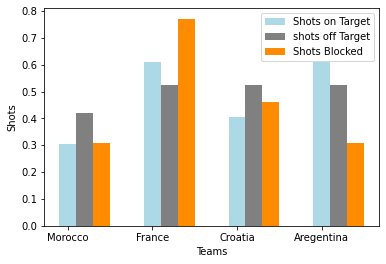

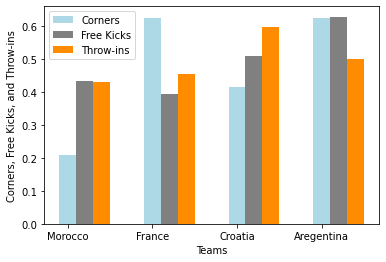

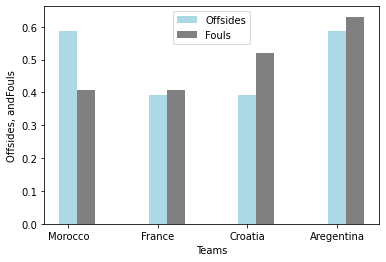

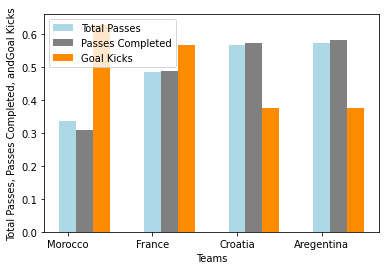

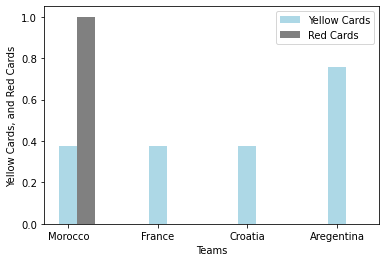

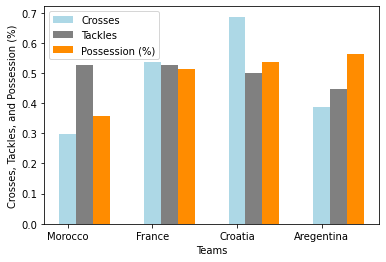

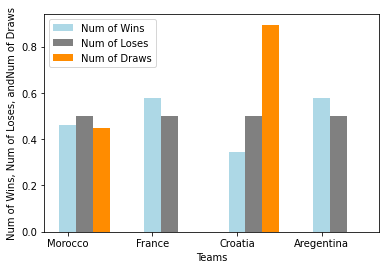

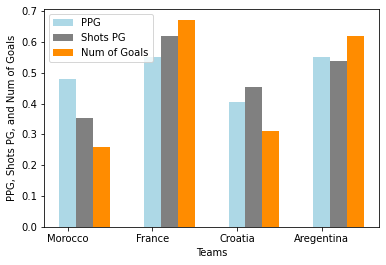

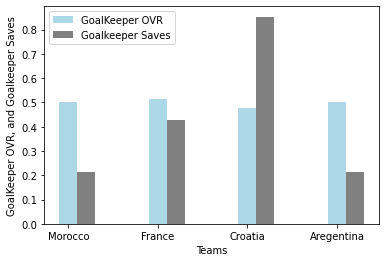

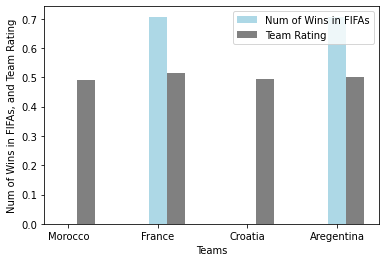

In [4]:
#Data visualization and analysis.
import numpy as np 
import matplotlib.pyplot as plt

#This function displays the features.
def displayFeatures(feature1, feature2, feature3, indexArr, yLabel):
    X_axis = np.arange(len(FIFA2022File['team']))
    if(feature3 != None):
        plt.bar(X_axis, normalizedData_DF[indexArr[0]], 0.2, label = feature1, color = 'lightblue')
        plt.bar(X_axis + 0.2, normalizedData_DF[indexArr[1]], 0.2, label = feature2, color = 'gray')
        plt.bar(X_axis + 0.4, normalizedData_DF[indexArr[2]], 0.2, label = feature3, color = 'darkorange')
        
    else:
        plt.bar(X_axis, normalizedData_DF[indexArr[0]], 0.2, label = feature1, color = 'lightblue')
        plt.bar(X_axis + 0.2, normalizedData_DF[indexArr[1]], 0.2, label = feature2, color = 'gray')
    
    plt.xticks(X_axis, FIFA2022File['team'])
    plt.xlabel("Teams")
    plt.ylabel(yLabel)
    #plt.title("Team")
    plt.legend()
    plt.show()

#Read the features' names from the CSV file.
featuresNames = []
index = 0
for row in FIFA2022File:
    if index == 0:
        index += 1
        continue
    featuresNames.append(row)

#Display the features using bar charts.
indexArr = [0, 1, 2]
displayFeatures(featuresNames[0], featuresNames[1], featuresNames[2], indexArr, "Shots")

indexArr = [3, 5, 9]
displayFeatures(featuresNames[3], featuresNames[5], featuresNames[9], indexArr, featuresNames[3] + ", " + featuresNames[5] + ", and " +
                featuresNames[9])

indexArr = [4, 8]
displayFeatures(featuresNames[4], featuresNames[8], None, indexArr, featuresNames[4] + ", and" + featuresNames[8])

indexArr = [6, 7, 10]
displayFeatures(featuresNames[6], featuresNames[7], featuresNames[10], indexArr, featuresNames[6] + ", " + featuresNames[7] + ", and" +
                featuresNames[10])

indexArr = [11, 13]
displayFeatures(featuresNames[11], featuresNames[13], None, indexArr, featuresNames[11] + ", and " + featuresNames[13])

indexArr = [12, 14, 22]
displayFeatures(featuresNames[12], featuresNames[14], featuresNames[22], indexArr, featuresNames[12] + ", " + featuresNames[14] + ", and " +
                featuresNames[22])

indexArr = [15, 16, 25]
displayFeatures(featuresNames[15], featuresNames[16], featuresNames[25], indexArr, featuresNames[15] + ", " + featuresNames[16] + ", and" +
                featuresNames[25])

indexArr = [17, 21, 20]
displayFeatures(featuresNames[17], featuresNames[21], featuresNames[20], indexArr, featuresNames[17] + ", " + featuresNames[21] + ", and " +
                featuresNames[20])

indexArr = [18, 24]
displayFeatures(featuresNames[18], featuresNames[24], None, indexArr, featuresNames[18] + ", and " + featuresNames[24])

indexArr = [19, 23]
displayFeatures(featuresNames[19], featuresNames[23], None, indexArr, featuresNames[19] + ", and " + featuresNames[23])




In [5]:
#Data reduction and feature selection.
correlationCounter = [0 for i in range(26)]
for i in range(26):
    for j in range(i + 1, 26):
        print (j)
        print(featuresNames[i] + "  <->  " + featuresNames[j])
        correlation = normalizedData_DF[i].corr(normalizedData_DF[j])
        print(correlation)
        if (correlation < 0) or (pd.isna(correlation)):
            correlationCounter[j] += 1
            print(True)

updatedFIFAFile =  normalizedData_DF
for i in range(26):
    if(correlationCounter[i] > 5):
        print("I'm here: " + str(i));
        del updatedFIFAFile[i]
print(updatedFIFAFile)

1
Shots on Target  <->  shots off Target
0.7777777777777779
2
Shots on Target  <->  Shots Blocked
0.4714045207910316
3
Shots on Target  <->  Corners
0.986440050415621
4
Shots on Target  <->  Offsides
-0.19245008972987535
True
5
Shots on Target  <->  Free Kicks
0.2939723678960656
6
Shots on Target  <->  Total Passes
0.615179568703253
7
Shots on Target  <->  Passes Completed
0.643148874548294
8
Shots on Target  <->  Fouls
0.40618119722996154
9
Shots on Target  <->  Throw-ins
-0.017946063401938914
True
10
Shots on Target  <->  Goal Kicks
-0.350329236163592
True
11
Shots on Target  <->  Yellow Cards
0.5555555555555556
12
Shots on Target  <->  Crosses
0.15552315827194782
13
Shots on Target  <->  Red Cards
-0.7777777777777778
True
14
Shots on Target  <->  Tackles
-0.47140452079103184
True
15
Shots on Target  <->  Num of Wins
0.7543365091413572
16
Shots on Target  <->  Num of Loses
nan
True
17
Shots on Target  <->  PPG
0.7492686492653553
18
Shots on Target  <->  GoalKeeper OVR
0.4856618642571

-0.34992710611188266
True
13
Yellow Cards  <->  Red Cards
-0.3333333333333333
True
14
Yellow Cards  <->  Tackles
-0.9428090415820635
True
15
Yellow Cards  <->  Num of Wins
0.5222329678670936
16
Yellow Cards  <->  Num of Loses
nan
True
17
Yellow Cards  <->  PPG
0.520325450878719
18
Yellow Cards  <->  GoalKeeper OVR
0.13245323570650436
19
Yellow Cards  <->  Num of Wins in FIFAs
0.5773502691896257
20
Yellow Cards  <->  Num of Goals
0.48989794855663554
21
Yellow Cards  <->  Shots PG
0.2766764968520394
22
Yellow Cards  <->  Possession (%)
0.506301390421811
23
Yellow Cards  <->  Team Rating
0.022490373369159267
24
Yellow Cards  <->  Goalkeeper Saves
-0.4714045207910315
True
25
Yellow Cards  <->  Num of Draws
-0.5222329678670934
True
13
Crosses  <->  Red Cards
-0.6998542122237651
True
14
Crosses  <->  Tackles
0.08247860988423245
15
Crosses  <->  Num of Wins
-0.4873159230985381
True
16
Crosses  <->  Num of Loses
nan
True
17
Crosses  <->  PPG
-0.49342590380096985
True
18
Crosses  <->  GoalKeepe

In [1]:
#Building a model to predict the name of the winning team.

#Dependencies
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))


ModuleNotFoundError: No module named 'tensorflow'